Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';', stringsAsFactors = T)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
library(dplyr)
airbnb <- select(airbnb, 'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
colnames(airbnb)

[1] "City"                 "Room.Type"            "Neighbourhood"       
 [4] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [7] "Beds"                 "Price"                "Square.Feet"         
[10] "Guests.Included"      "Extra.People"         "Review.Scores.Rating"
[13] "Latitude"             "Longitude"

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid <- airbnb[which(airbnb$City == 'Madrid'),]
df_madrid <- df_madrid[which(df_madrid$Room.Type == 'Entire home/apt'),]
df_madrid <- df_madrid[!(df_madrid$Neighbourhood==""), ]
head(df_madrid, 5)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
4,Madrid,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Madrid,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,Madrid,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [5]:
df_madrid$Square.Meters <- round(df_madrid$Square.Feet*0.092903, 2)
head(df_madrid, 3)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
4,Madrid,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Madrid,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,Madrid,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [6]:
# table(df_madrid$Square.Meters, useNA = c("ifany"))
# sum(is.na(df_madrid$Square.Meters))/length(df_madrid$Square.Meters)

mean(is.na(df_madrid$Square.Meters))*100

[1] 93.80468

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [7]:
sum(df_madrid$Square.Meters == 0, na.rm = TRUE)/sum(!is.na(df_madrid$Square.Meters))

[1] 0.3688761

Reemplazar todos los 0m^2 por NA 

In [8]:
df_madrid$Square.Meters <- replace(df_madrid$Square.Meters, df_madrid$Square.Meters == 0 , NA)

In [9]:
mean(is.na(df_madrid$Square.Meters))*100

[1] 96.08998

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más, además crearemos una variable sintética nueva basada en la similitud entre barrios.

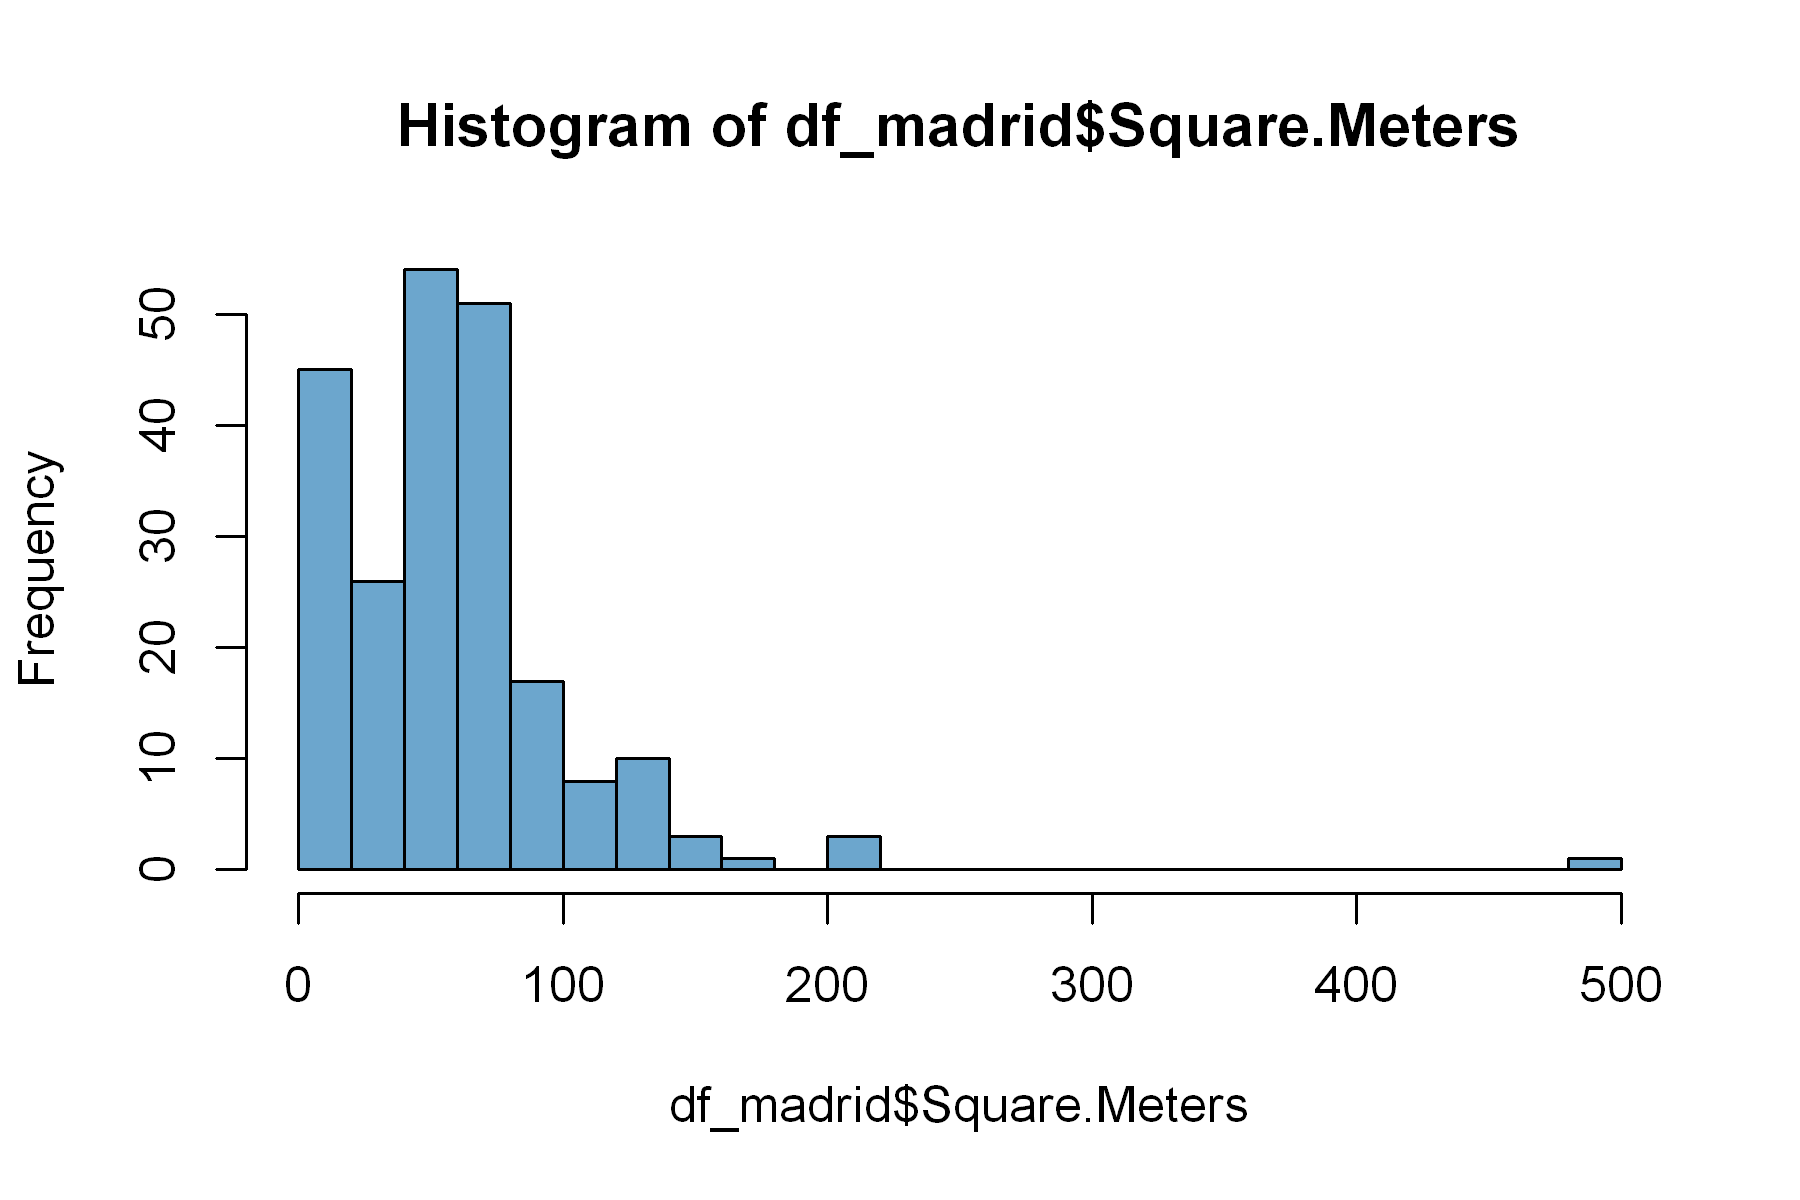

In [10]:
hist(df_madrid$Square.Meters, col = 'skyblue3', breaks = 20)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [11]:
df_madrid$Square.Meters <- replace(df_madrid$Square.Meters, df_madrid$Square.Meters < 20 , NA)

In [12]:
mean(is.na(df_madrid$Square.Meters))*100

[1] 96.89341

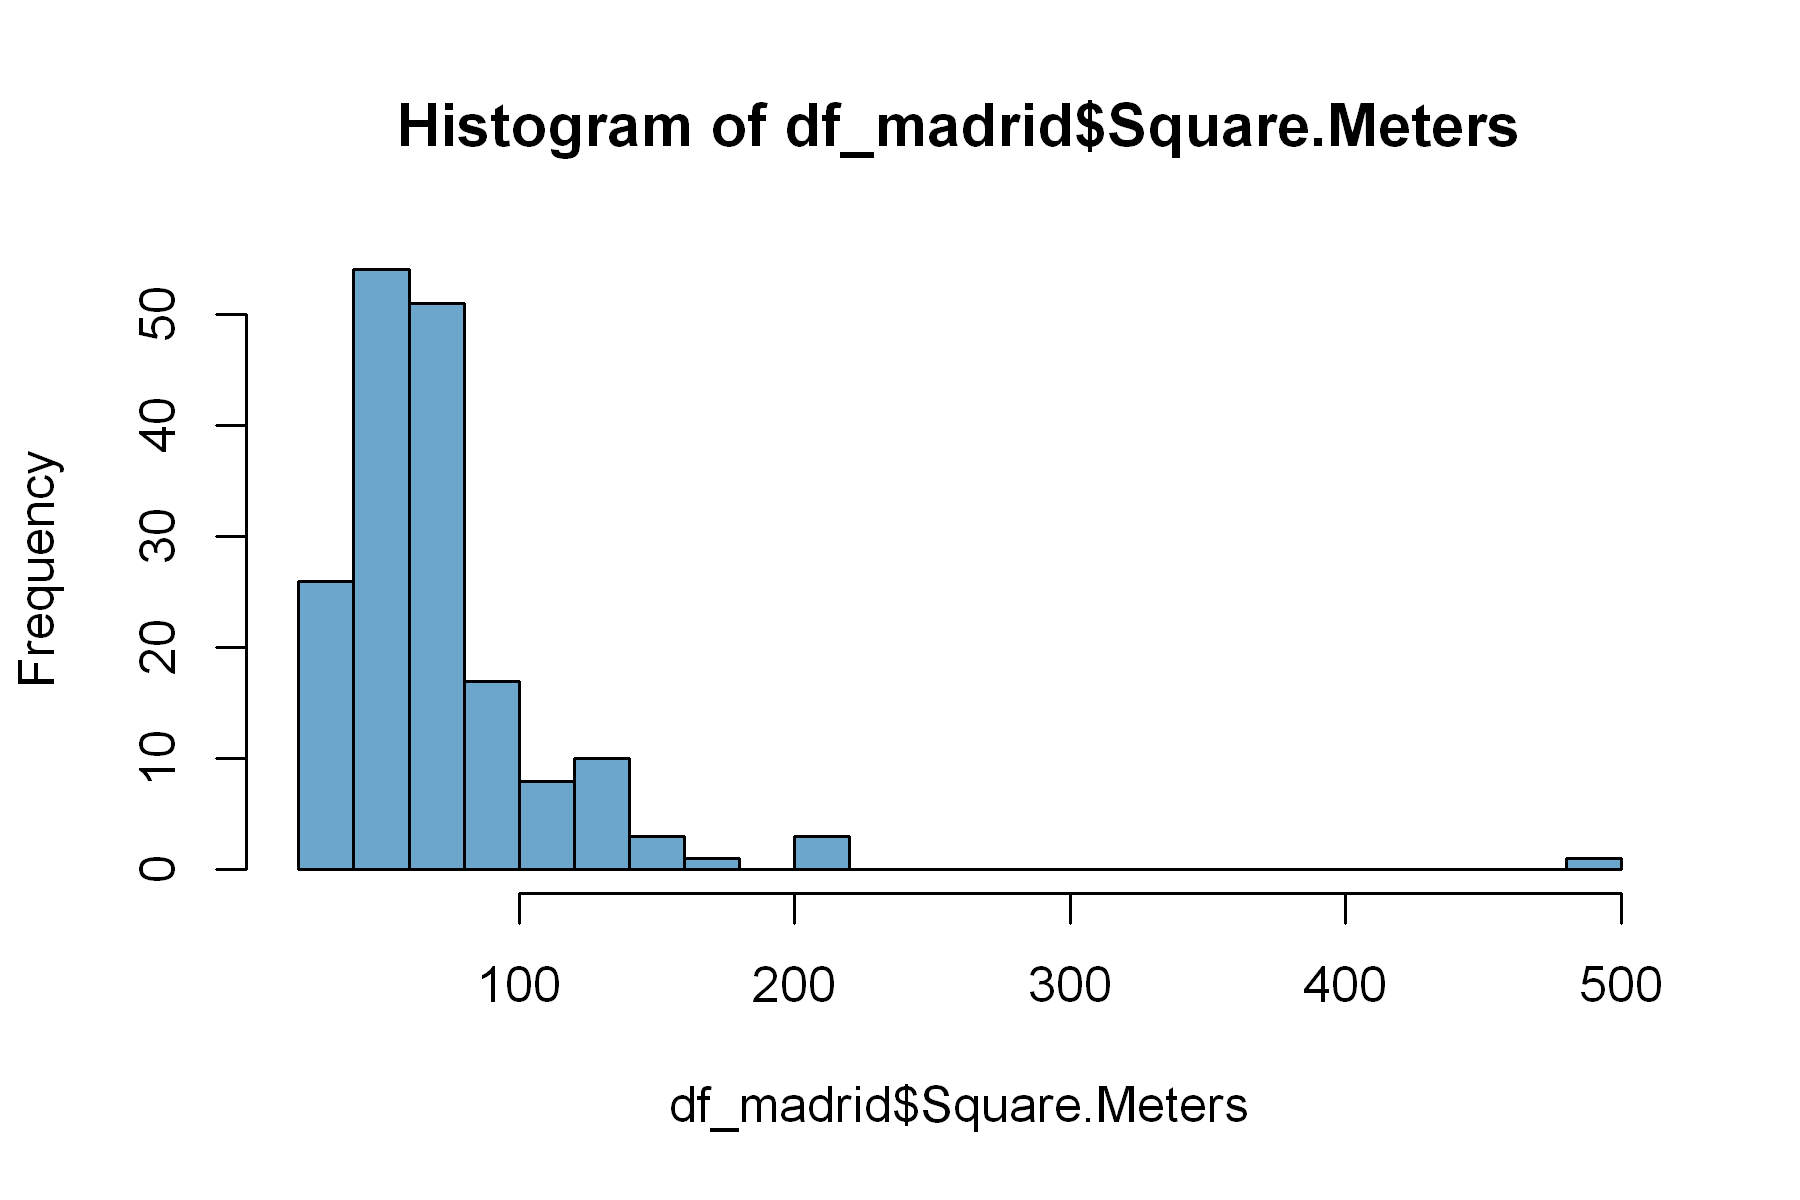

In [13]:
hist(df_madrid$Square.Meters, col = 'skyblue3', breaks = 20)

Existen varios Barrios que todas sus entradas son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [14]:
#x <- aggregate(is.na(df_madrid$Square.Meters), by = df_madrid[c('Neighbourhood')], mean)
#x1 <- filter(x, x == 1)

# Contamos cuántas obervaciones no son NA por barrio y quitamos las que tengan cero no NA
x <- aggregate(Square.Meters ~ Neighbourhood, data=df_madrid, function(x) {sum(!is.na(x))}, na.action = NULL)

df_madrid  <- df_madrid[ ! df_madrid$Neighbourhood %in% x$Neighbourhood[x$Square.Meters < 1], ]

In [15]:
# Se eliminan barrios con cero observaciones
df_madrid$Neighbourhood = droplevels(df_madrid$Neighbourhood)
table(df_madrid$Neighbourhood)


         Acacias          Adelfas          Almagro         Almenara 
              33               26               75               20 
        Arapiles       ArgÃ¼elles          Barajas      Carabanchel 
              66              118               11               76 
      Castellana         Castilla           Centro        ChamberÃ­ 
              51               17               13               14 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
              18               76              441               45 
 El TrÃ©ntaiseis          El Viso      Embajadores Fuente del Berro 
              10               18              585               33 
            Goya       JerÃ³nimos         Justicia        La Latina 
             108               33              384              571 
           Lista        MalasaÃ±a        Moratalaz         Pacifico 
              47              679               15               44 
         Palacio  Palos do Moguer

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


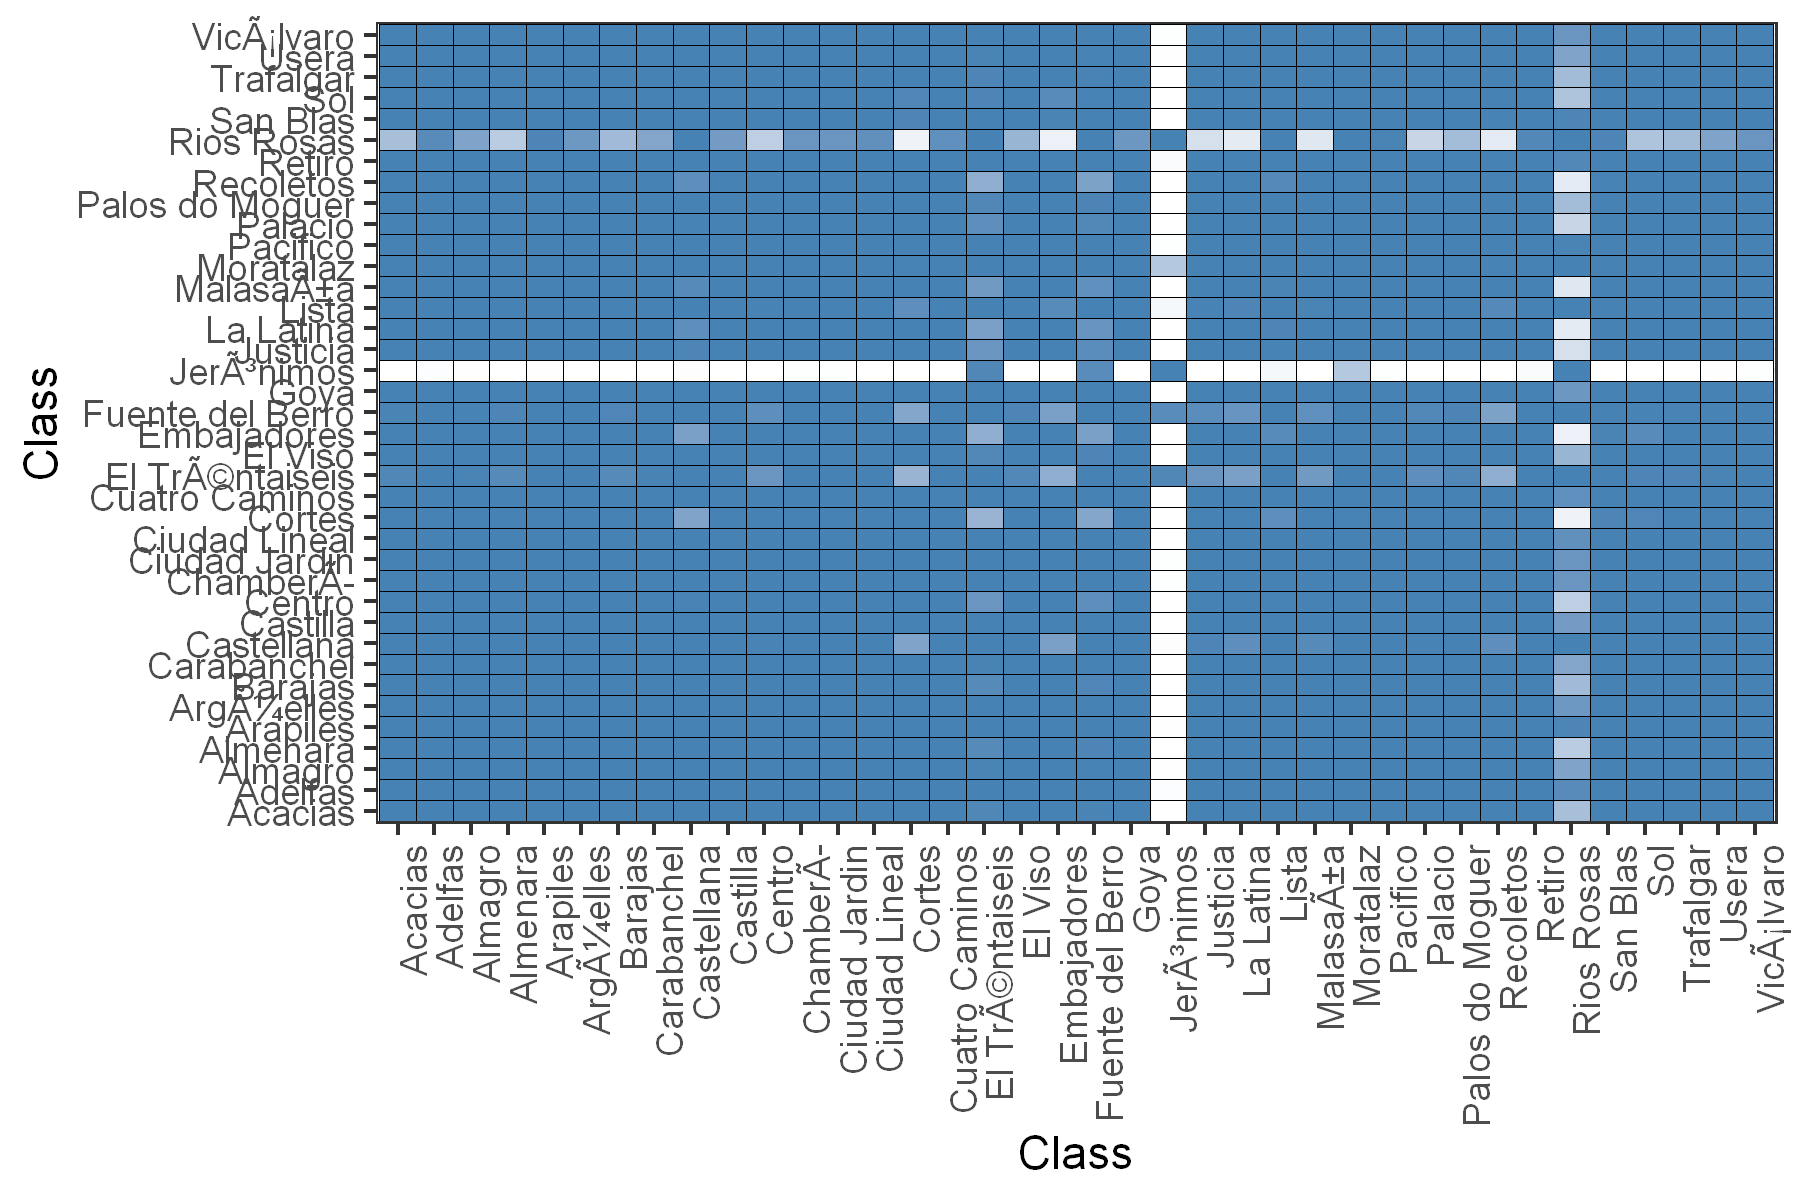

In [16]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


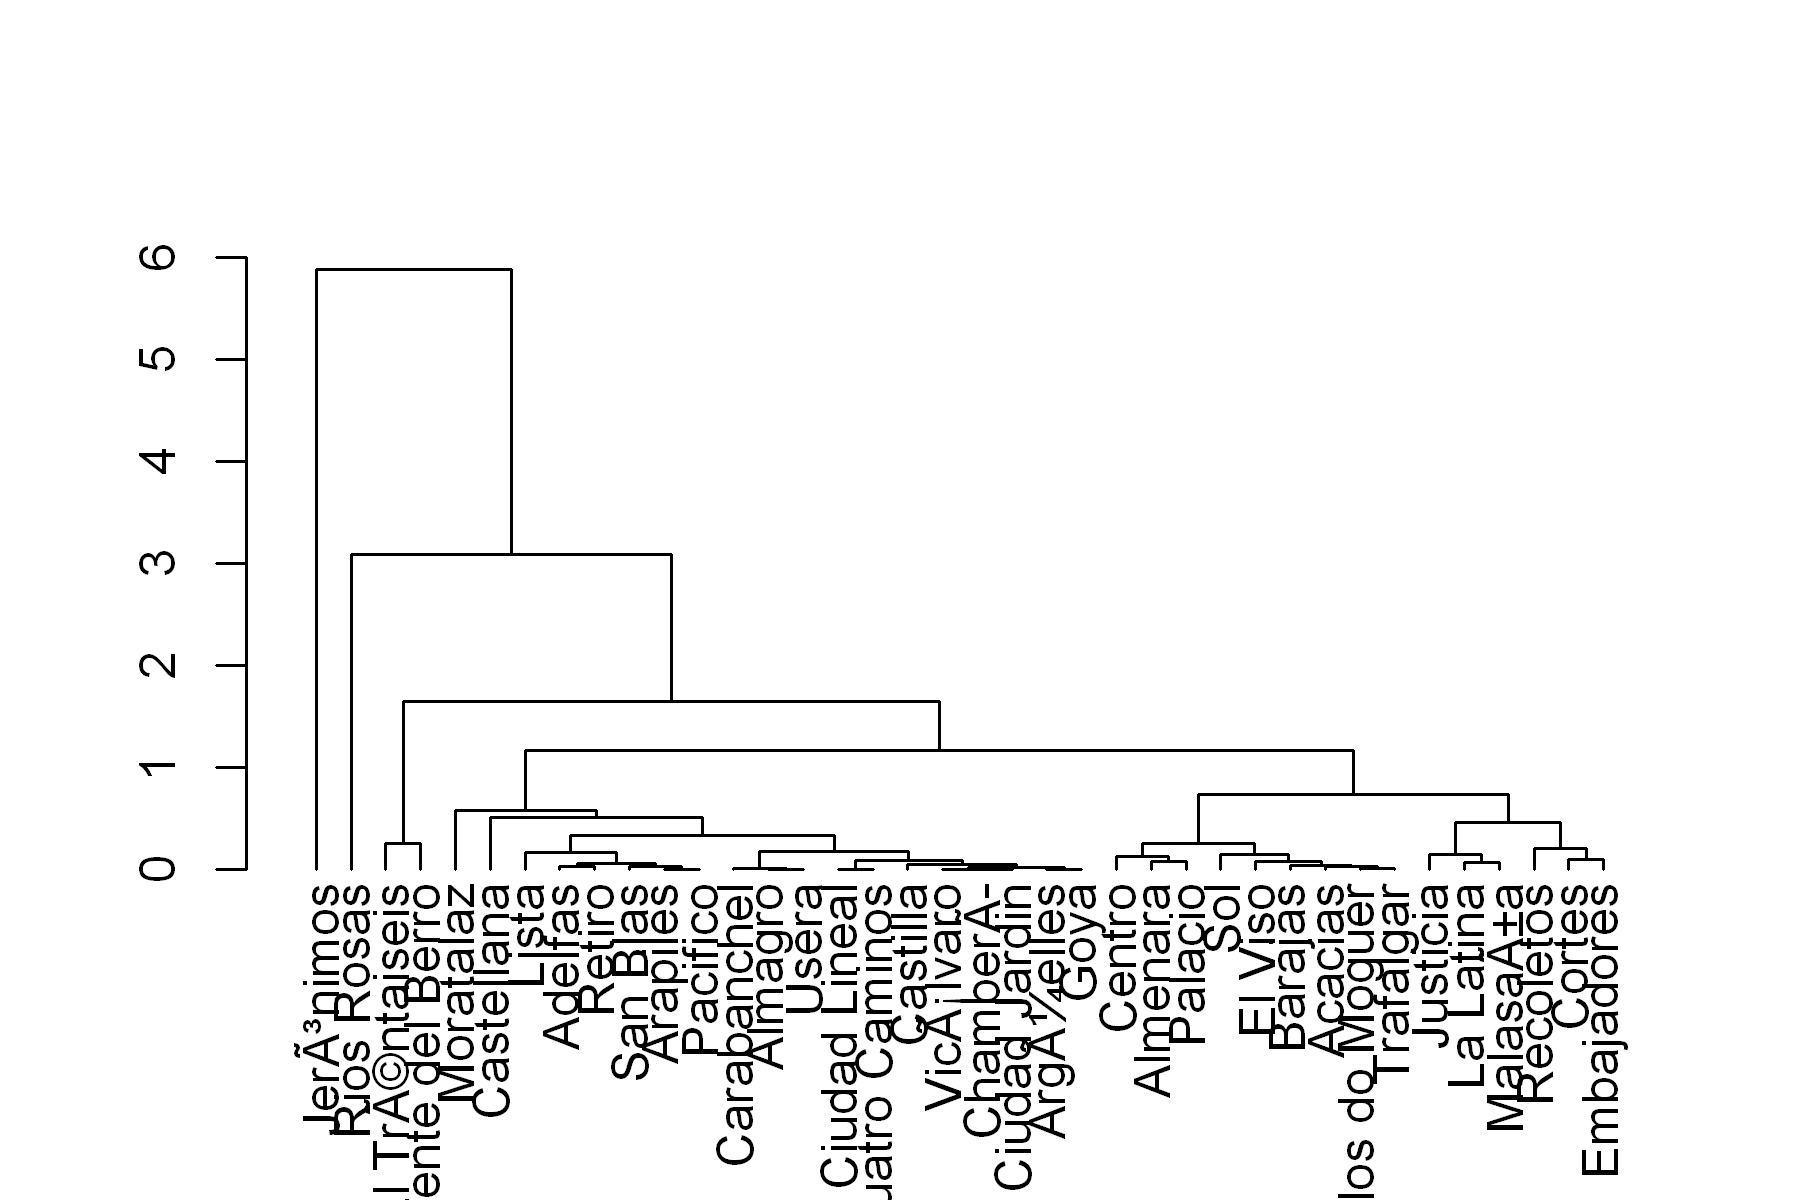

In [17]:
dist<- dist(1-resm)
hc <- hclust(dist, method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

Warning message:
"package 'dendextend' was built under R version 3.6.3"

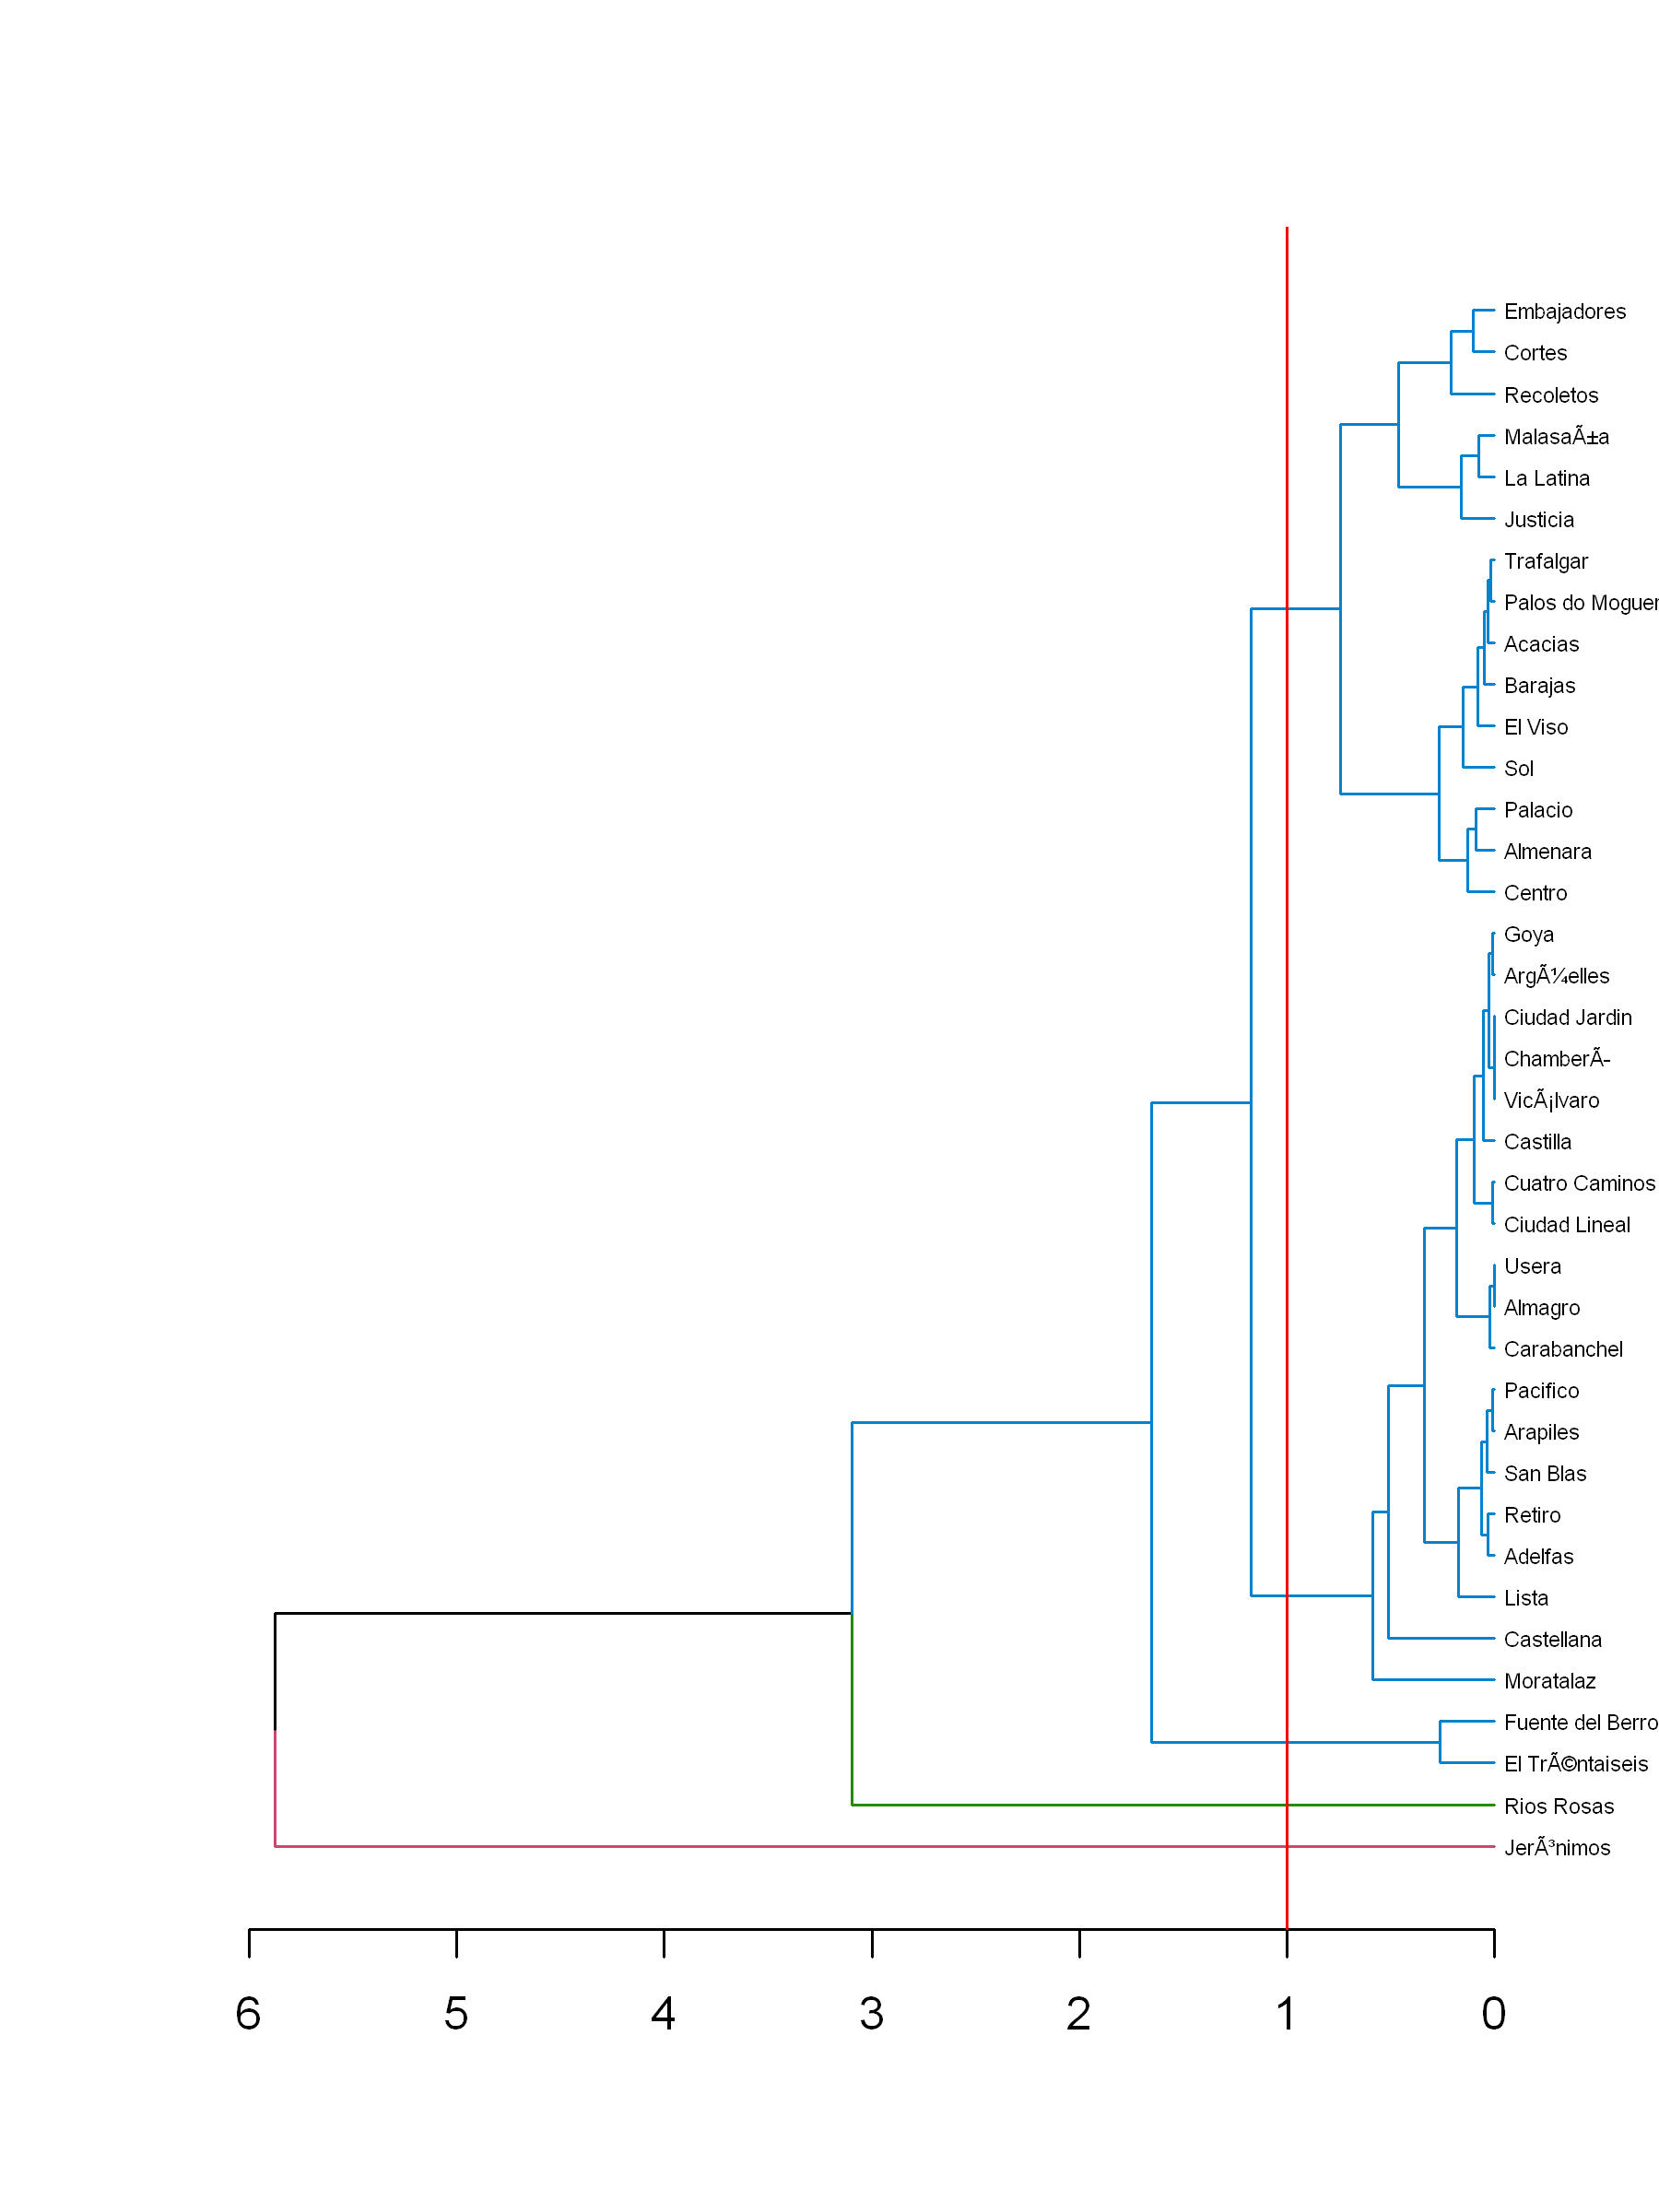

In [18]:
suppressPackageStartupMessages(library(dendextend))
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
#labels(hcd)<-iris$Species[labels(hcd)]
hcd<-set(hcd,"labels_cex", 0.45) 
plot(color_branches(hcd,h=2),horiz=TRUE,cex=0)
abline(v=1,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

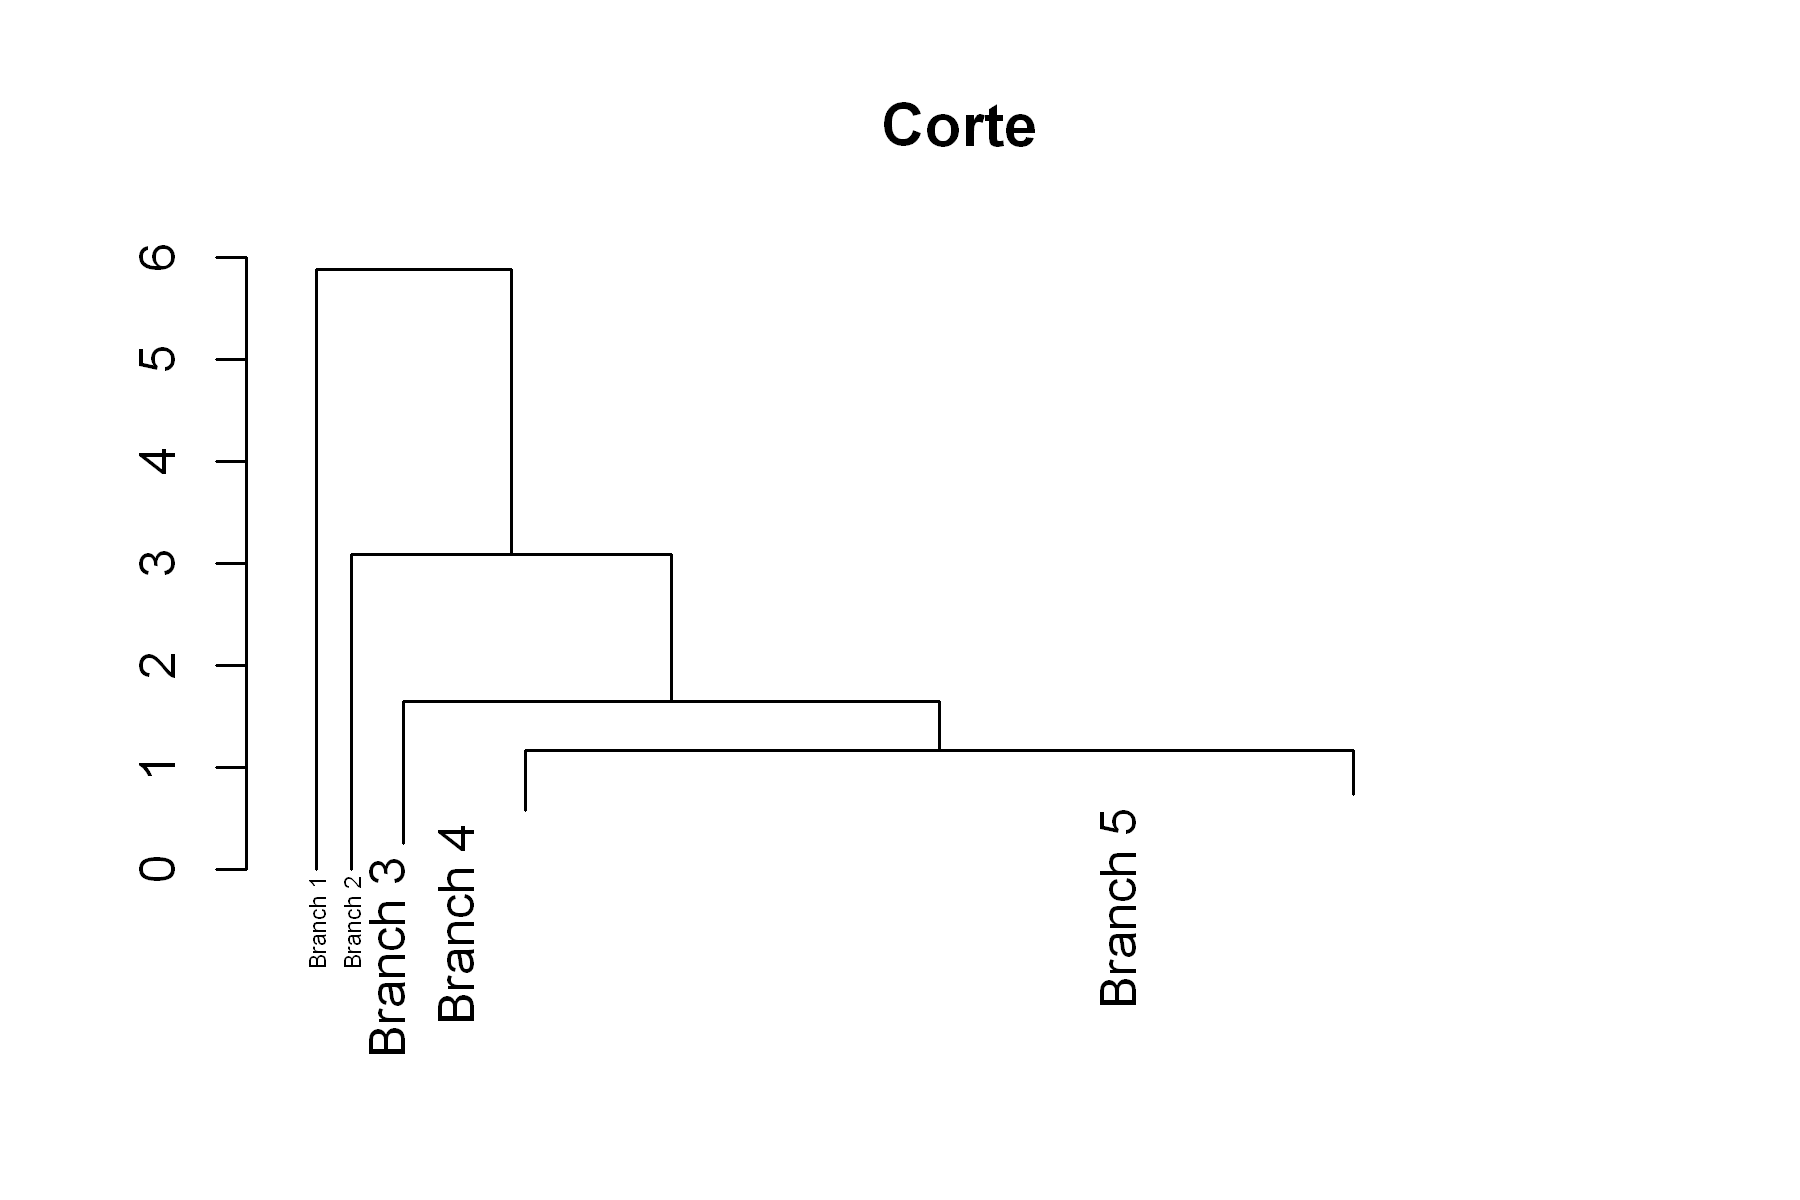

In [19]:
plot(cut(hcd, h = 1)$upper, main = "Corte", cex=1)

In [20]:
table(cn,
      cutree_1h.dendrogram(hcd,h=1))

                  
cn                 1 2 3 4 5
  Acacias          1 0 0 0 0
  Adelfas          0 1 0 0 0
  Almagro          0 1 0 0 0
  Almenara         1 0 0 0 0
  Arapiles         0 1 0 0 0
  ArgÃ¼elles       0 1 0 0 0
  Barajas          1 0 0 0 0
  Carabanchel      0 1 0 0 0
  Castellana       0 1 0 0 0
  Castilla         0 1 0 0 0
  Centro           1 0 0 0 0
  ChamberÃ­        0 1 0 0 0
  Ciudad Jardin    0 1 0 0 0
  Ciudad Lineal    0 1 0 0 0
  Cortes           1 0 0 0 0
  Cuatro Caminos   0 1 0 0 0
  El TrÃ©ntaiseis  0 0 1 0 0
  El Viso          1 0 0 0 0
  Embajadores      1 0 0 0 0
  Fuente del Berro 0 0 1 0 0
  Goya             0 1 0 0 0
  JerÃ³nimos       0 0 0 0 1
  Justicia         1 0 0 0 0
  La Latina        1 0 0 0 0
  Lista            0 1 0 0 0
  MalasaÃ±a        1 0 0 0 0
  Moratalaz        0 1 0 0 0
  Pacifico         0 1 0 0 0
  Palacio          1 0 0 0 0
  Palos do Moguer  1 0 0 0 0
  Recoletos        1 0 0 0 0
  Retiro           0 1 0 0 0
  Rios Rosas       0 0 0

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [21]:
# tomaré la tasa de corte de 1. Aparecen 5 clusters.

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [22]:
clu <-cutree_1h.dendrogram(hcd,h=1)
aux <- data.frame('Neighbourhood' = names(clu), 'neighb_id' = clu)
df_madrid <- merge(aux, df_madrid, by='Neighbourhood')

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [23]:
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.75)
df_madrid.train<-df_madrid[idx,]
df_madrid.test <-df_madrid[-idx,]
paste("Número de observaciones en train:",nrow(df_madrid.train))
paste("Número de observaciones en test:",nrow(df_madrid.test))

[1] "Número de observaciones en train: 3675"

[1] "Número de observaciones en test: 1226"

In [24]:
model_metros_1 <- lm(data= df_madrid.train, formula="Square.Meters~ + Bedrooms + Price + Accommodates + neighb_id")

In [25]:
summary(model_metros_1)


Call:
lm(formula = "Square.Meters~ + Bedrooms + Price + Accommodates + neighb_id", 
    data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.641  -9.763  -1.035   8.766 119.566 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -36.99251    6.13485  -6.030 1.86e-08 ***
Bedrooms       9.68990    3.68169   2.632  0.00961 ** 
Price          0.07085    0.02955   2.398  0.01805 *  
Accommodates   8.42307    1.56627   5.378 3.78e-07 ***
neighb_id     37.67557    4.03024   9.348 6.14e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.1 on 120 degrees of freedom
  (3550 observations deleted due to missingness)
Multiple R-squared:  0.7752,	Adjusted R-squared:  0.7677 
F-statistic: 103.4 on 4 and 120 DF,  p-value: < 2.2e-16


In [26]:
df_madrid.train$meters_est<-predict(model_metros_1,df_madrid.train)
df_madrid.train

,Neighbourhood,neighb_id,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,meters_est
4440,Sol,1,Madrid,Entire home/apt,2,1.0,0,1,53,NA,1,0,100,40.41766,-3.706968,NA,21.28422
12,Acacias,1,Madrid,Entire home/apt,3,1.0,1,1,122,NA,1,0,NA,40.39957,-3.702361,NA,44.28578
1225,Embajadores,1,Madrid,Entire home/apt,5,1.0,2,3,75,NA,2,10,91,40.40653,-3.699515,NA,67.49192
4541,Sol,1,Madrid,Entire home/apt,4,1.0,1,4,100,NA,1,0,88,40.41947,-3.702245,NA,51.15017
4144,Rios Rosas,4,Madrid,Entire home/apt,7,2.0,3,7,100,NA,5,50,94,40.44365,-3.699825,NA,208.82592
643,Cortes,1,Madrid,Entire home/apt,2,1.0,0,1,57,NA,1,0,94,40.41206,-3.696415,NA,21.56761
3332,MalasaÃ±a,1,Madrid,Entire home/apt,5,1.0,2,3,90,NA,4,14,NA,40.42644,-3.704116,NA,68.55466
1688,Embajadores,1,Madrid,Entire home/apt,4,1.0,1,2,42,NA,2,20,93,40.41080,-3.697923,NA,47.04092
4002,Palos do Moguer,1,Madrid,Entire home/apt,2,2.0,1,2,58,0,2,0,94,40.40223,-3.699856,NA,31.32836
2711,La Latina,1,Madrid,Entire home/apt,2,1.0,1,1,60,NA,1,0,96,40.41051,-3.711581,NA,31.47006


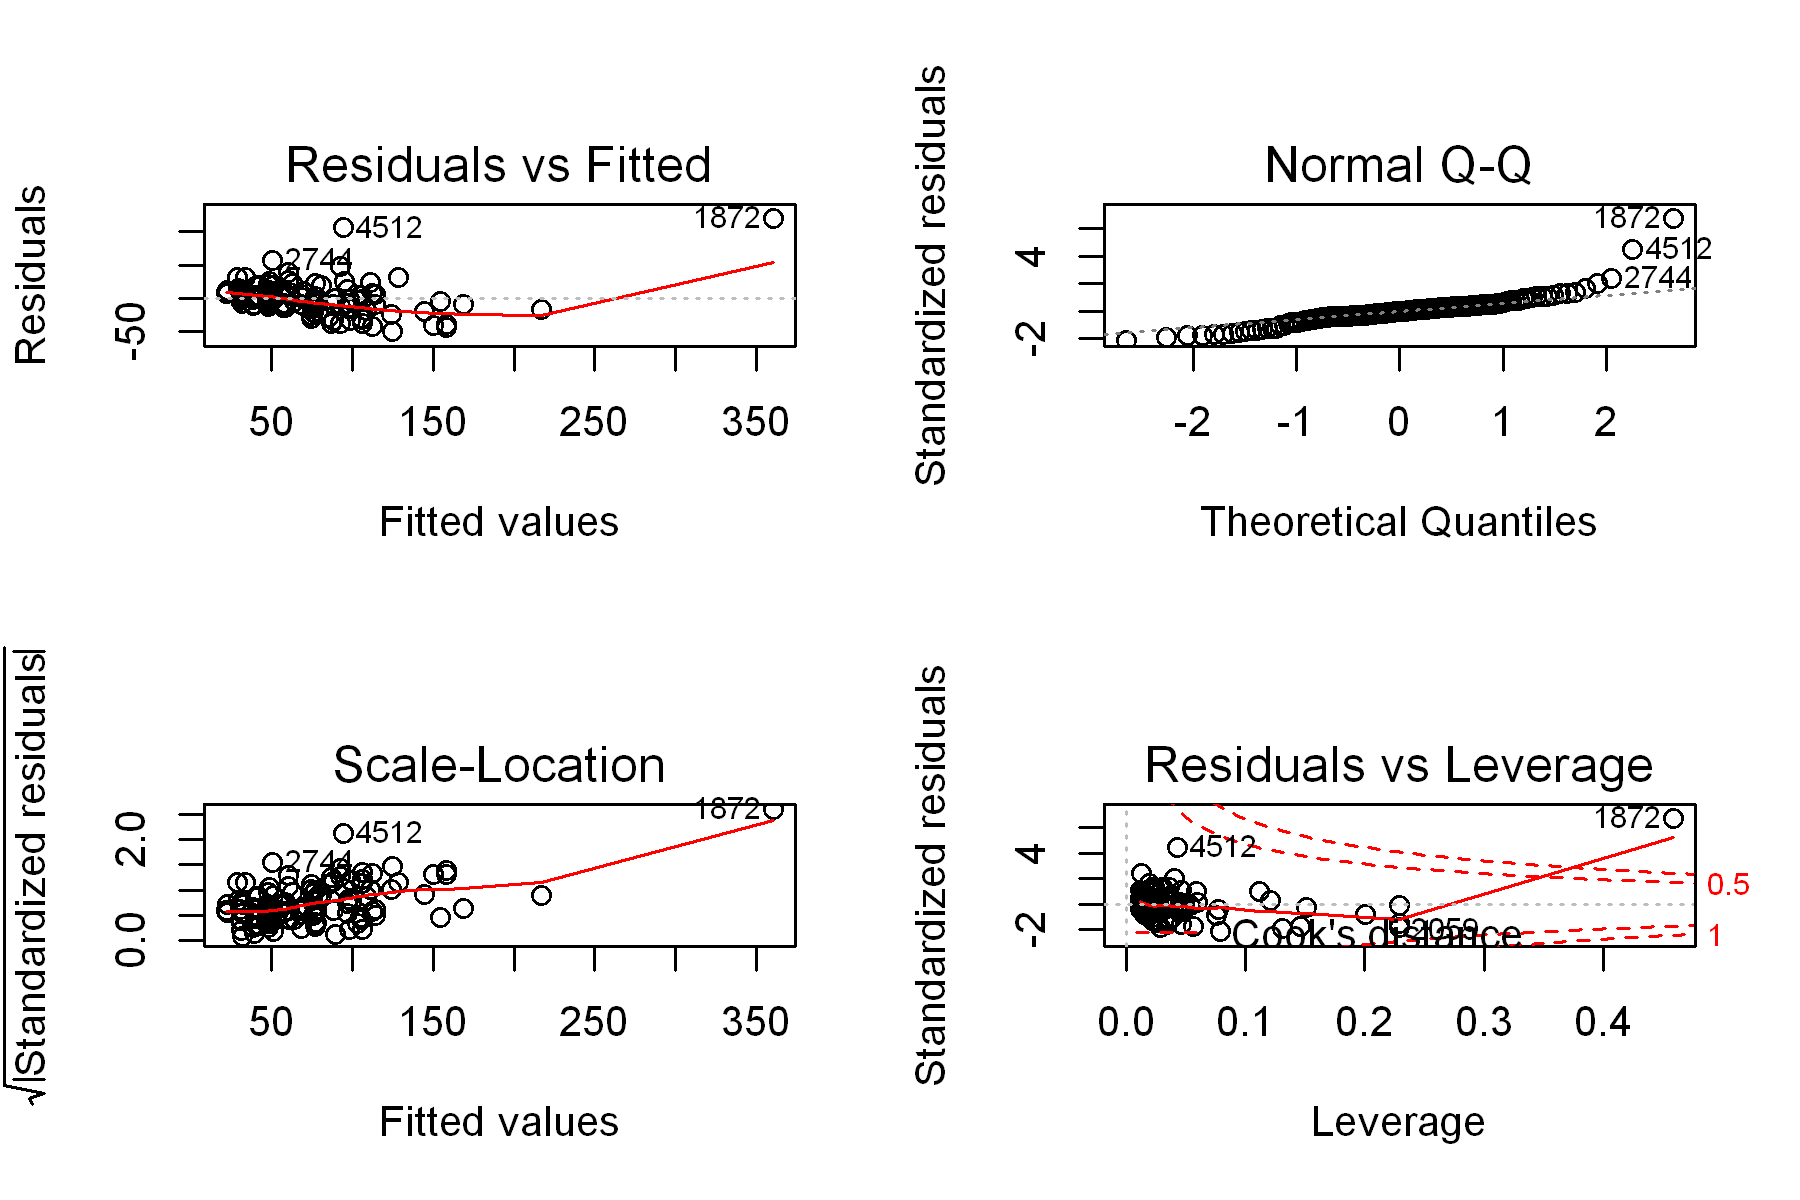

In [27]:
par(mfrow=c(2,2))
plot(model_metros_1)

In [28]:
model_metros_2 <- lm(data= df_madrid.train, formula="Square.Meters~ + Bedrooms + Accommodates + neighb_id")
summary(model_metros_2)


Call:
lm(formula = "Square.Meters~ + Bedrooms + Accommodates + neighb_id", 
    data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.339 -11.123  -1.159  10.481 122.886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -36.502      6.173  -5.913 3.14e-08 ***
Bedrooms       11.875      3.616   3.284  0.00133 ** 
Accommodates    9.019      1.568   5.752 6.68e-08 ***
neighb_id      37.992      3.993   9.514  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.47 on 122 degrees of freedom
  (3549 observations deleted due to missingness)
Multiple R-squared:  0.7706,	Adjusted R-squared:  0.7649 
F-statistic: 136.6 on 3 and 122 DF,  p-value: < 2.2e-16


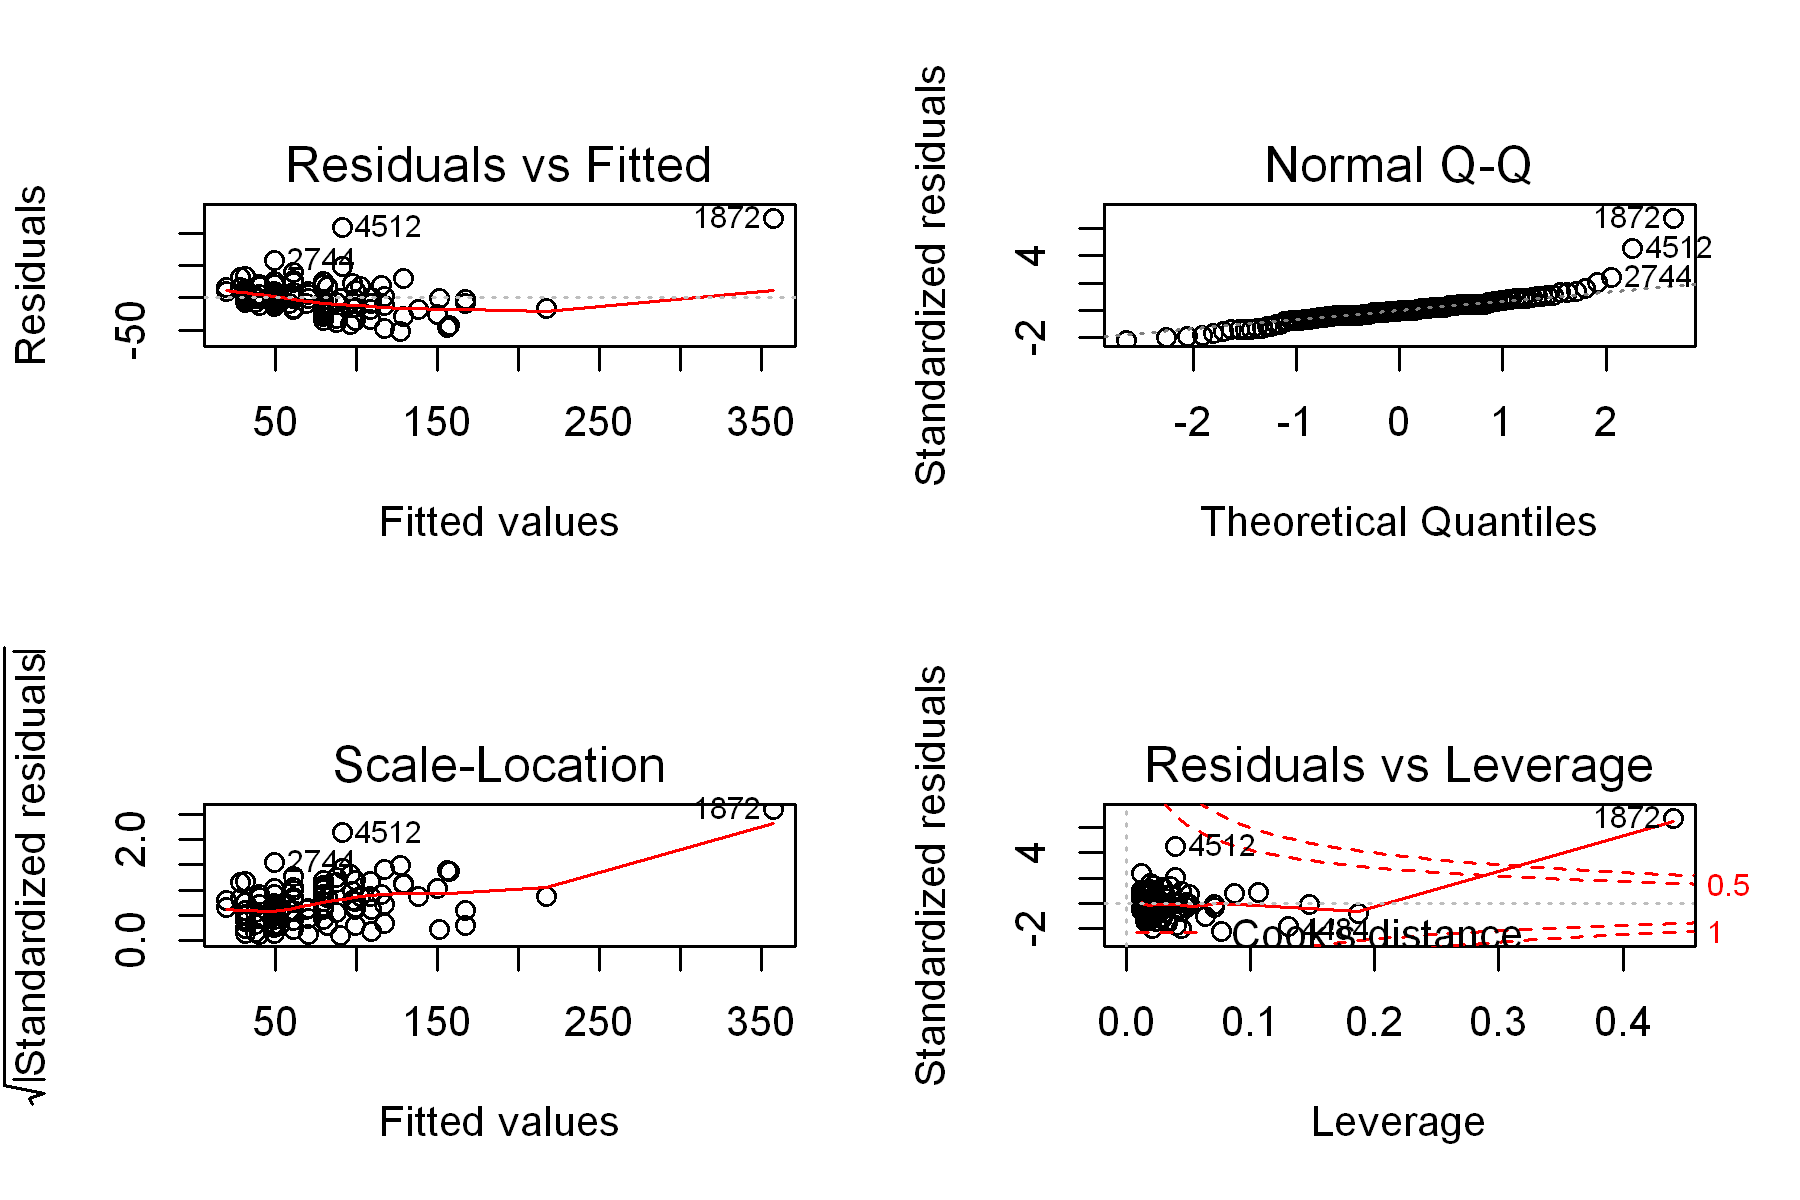

In [29]:
par(mfrow=c(2,2))
plot(model_metros_2)

In [30]:
# Model 1

df_madrid.test_na <- na.omit(df_madrid.test)
pred1 <- predict(model_metros_1, newdata = df_madrid.test_na)
rmse <- sqrt(sum((exp(pred1) - df_madrid.test_na$Square.Meters)^2)/length(df_madrid.test_na$Square.Meters))
c(RMSE = rmse, R2=summary(model_metros_1)$r.squared)

RMSE           R2 
4.873498e+86 7.751607e-01

In [31]:
# Model 2

pred1 <- predict(model_metros_2, newdata = df_madrid.test_na)
rmse <- sqrt(sum((exp(pred1) - df_madrid.test_na$Square.Meters)^2)/length(df_madrid.test_na$Square.Meters))
c(RMSE = rmse, R2=summary(model_metros_2)$r.squared)

RMSE           R2 
4.462627e+86 7.705688e-01

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

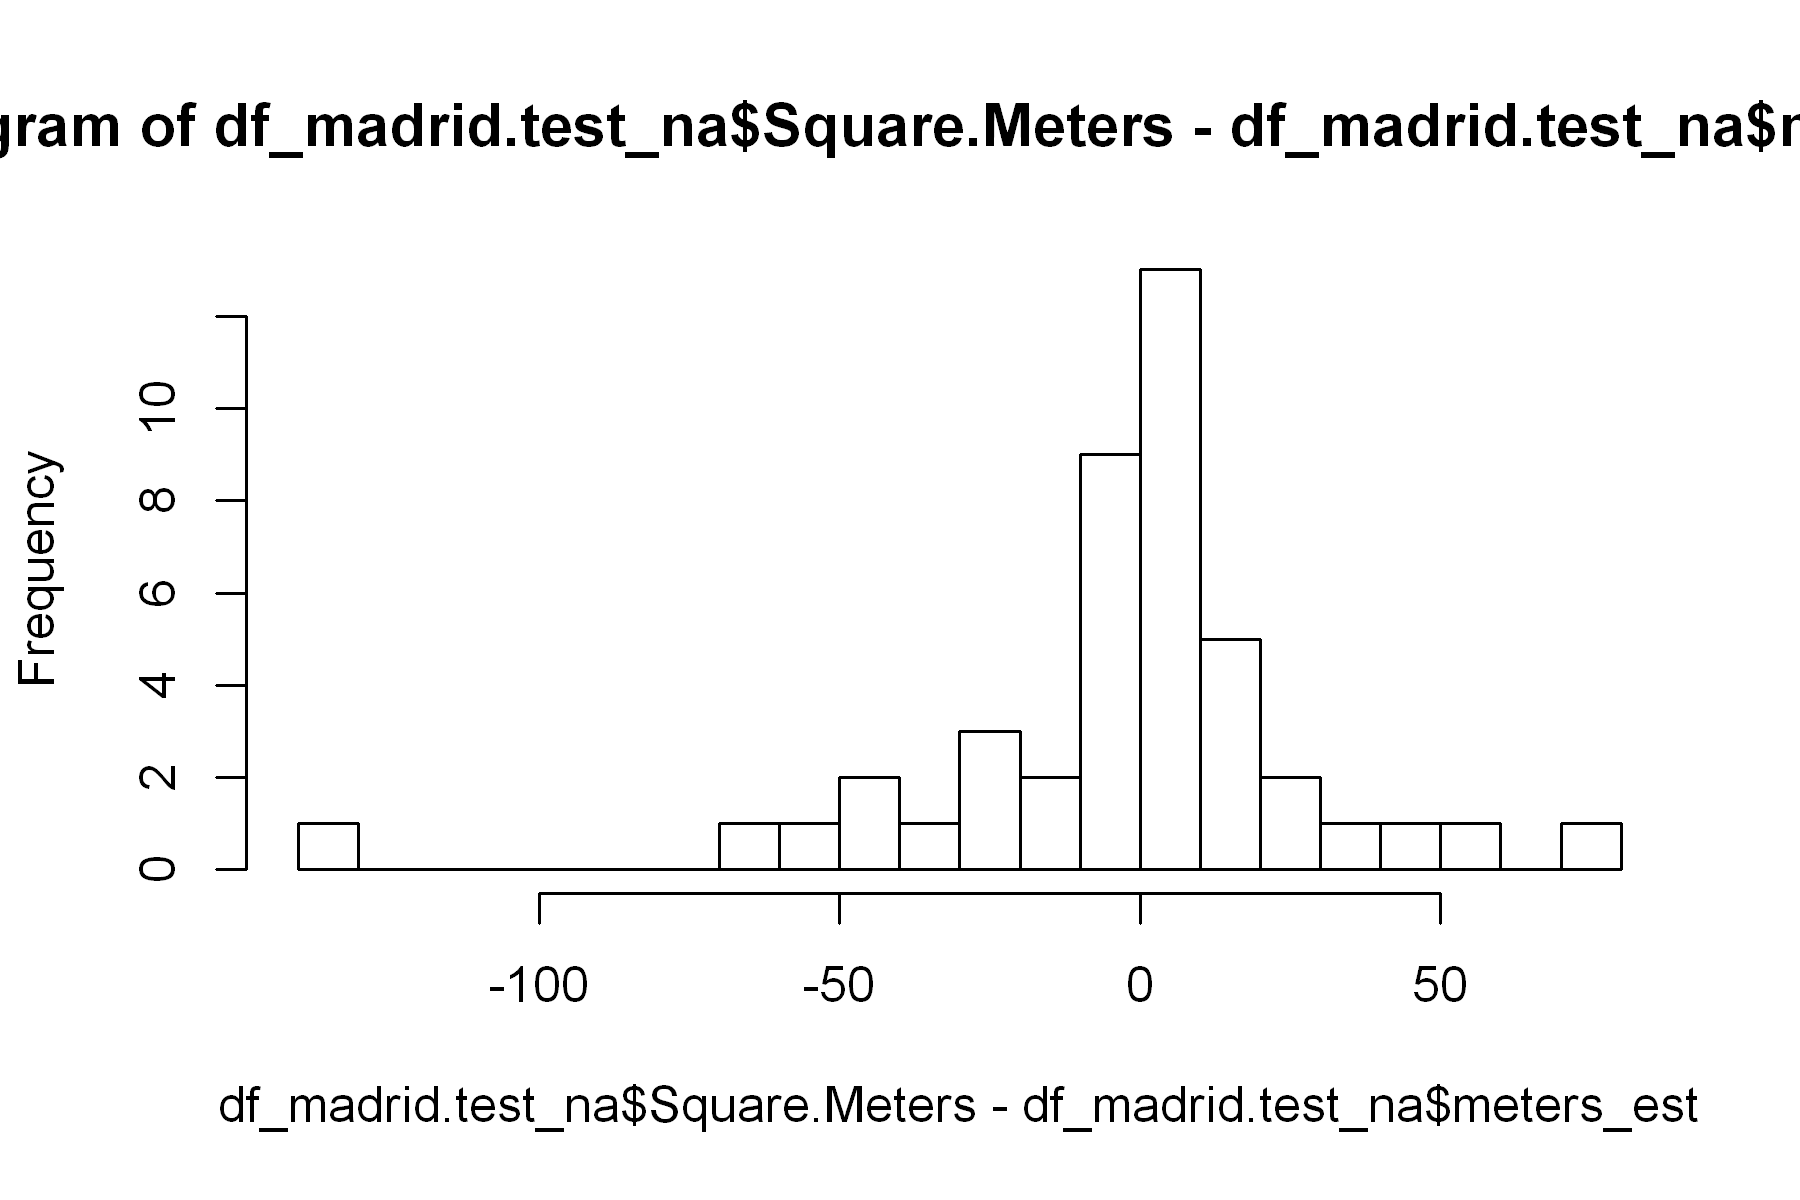

In [32]:
#Model 1

df_madrid.test_na$meters_est <-predict(model_metros_1, df_madrid.test_na)
hist(df_madrid.test_na$Square.Meters-df_madrid.test_na$meters_est,20)

In [33]:
# Aunque con colas anchas, diría que la distribución se acerca a una normal

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [34]:
new_data <- c(3,80,6,clu["Sol"])
newnames<-c("Bedrooms","Price","Accommodates","neighb_id")
names(new_data) <-newnames
new_data<-data.frame(t(new_data))
new_predict <-predict(model_metros_1, new_data)
new_predict

1 
85.95914

In [35]:
# 4 habitaciones 
new_data <- c(4,80,6,clu["Sol"])
newnames<-c("Bedrooms","Price","Accommodates","neighb_id")
names(new_data) <-newnames
new_data<-data.frame(t(new_data))
new_predict <-predict(model_metros_1, new_data)
new_predict

1 
95.64904

In [36]:
# 5 habitaciones
new_data <- c(5,80,6,clu["Sol"])
newnames<-c("Bedrooms","Price","Accommodates","neighb_id")
names(new_data) <-newnames
new_data<-data.frame(t(new_data))
new_predict <-predict(model_metros_1, new_data)
new_predict

1 
105.3389

In [37]:
model_metros_1$coef

(Intercept)     Bedrooms        Price Accommodates    neighb_id 
-36.99250853   9.68990364   0.07084918   8.42307123  37.67557448

In [38]:
# Los metros cuadrados aumentan en 13.66 por cada habitación adicional

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [39]:
predicted_meters <- predict(model_metros_1, df_madrid)

df_madrid$Square.Meters <- ifelse(is.na(df_madrid$Square.Meters), predicted_meters, df_madrid$Square.Meters)

In [40]:
head(df_madrid)

Neighbourhood,neighb_id,City,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
Acacias,1,Madrid,Entire home/apt,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,19.65468
Acacias,1,Madrid,Entire home/apt,4,1.0,2,3,60,NA,1,0,92,40.40604,-3.710295,58.00611
Acacias,1,Madrid,Entire home/apt,4,1.0,2,2,74,NA,3,15,100,40.39801,-3.702725,58.99800
Acacias,1,Madrid,Entire home/apt,6,1.0,2,3,60,NA,2,10,88,40.40554,-3.710429,74.85225
Acacias,1,Madrid,Entire home/apt,4,1.0,1,2,60,753,2,12,85,40.40073,-3.706203,69.96000
Acacias,1,Madrid,Entire home/apt,2,1.0,0,1,39,NA,1,0,100,40.40094,-3.702806,20.29233


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [41]:
df_madrid_pca <- df_madrid[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price',
                                 'Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]

In [42]:
pca <- prcomp(na.omit(df_madrid_pca),center = TRUE, scale. = TRUE)

In [43]:
summary(pca)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.172 1.1900 1.03052 0.99951 0.83090 0.76891 0.71814
Proportion of Variance 0.429 0.1288 0.09654 0.09082 0.06276 0.05375 0.04688
Cumulative Proportion  0.429 0.5577 0.65426 0.74508 0.80785 0.86159 0.90848
                           PC8     PC9    PC10    PC11
Standard deviation     0.57405 0.55155 0.48700 0.36858
Proportion of Variance 0.02996 0.02765 0.02156 0.01235
Cumulative Proportion  0.93843 0.96609 0.98765 1.00000

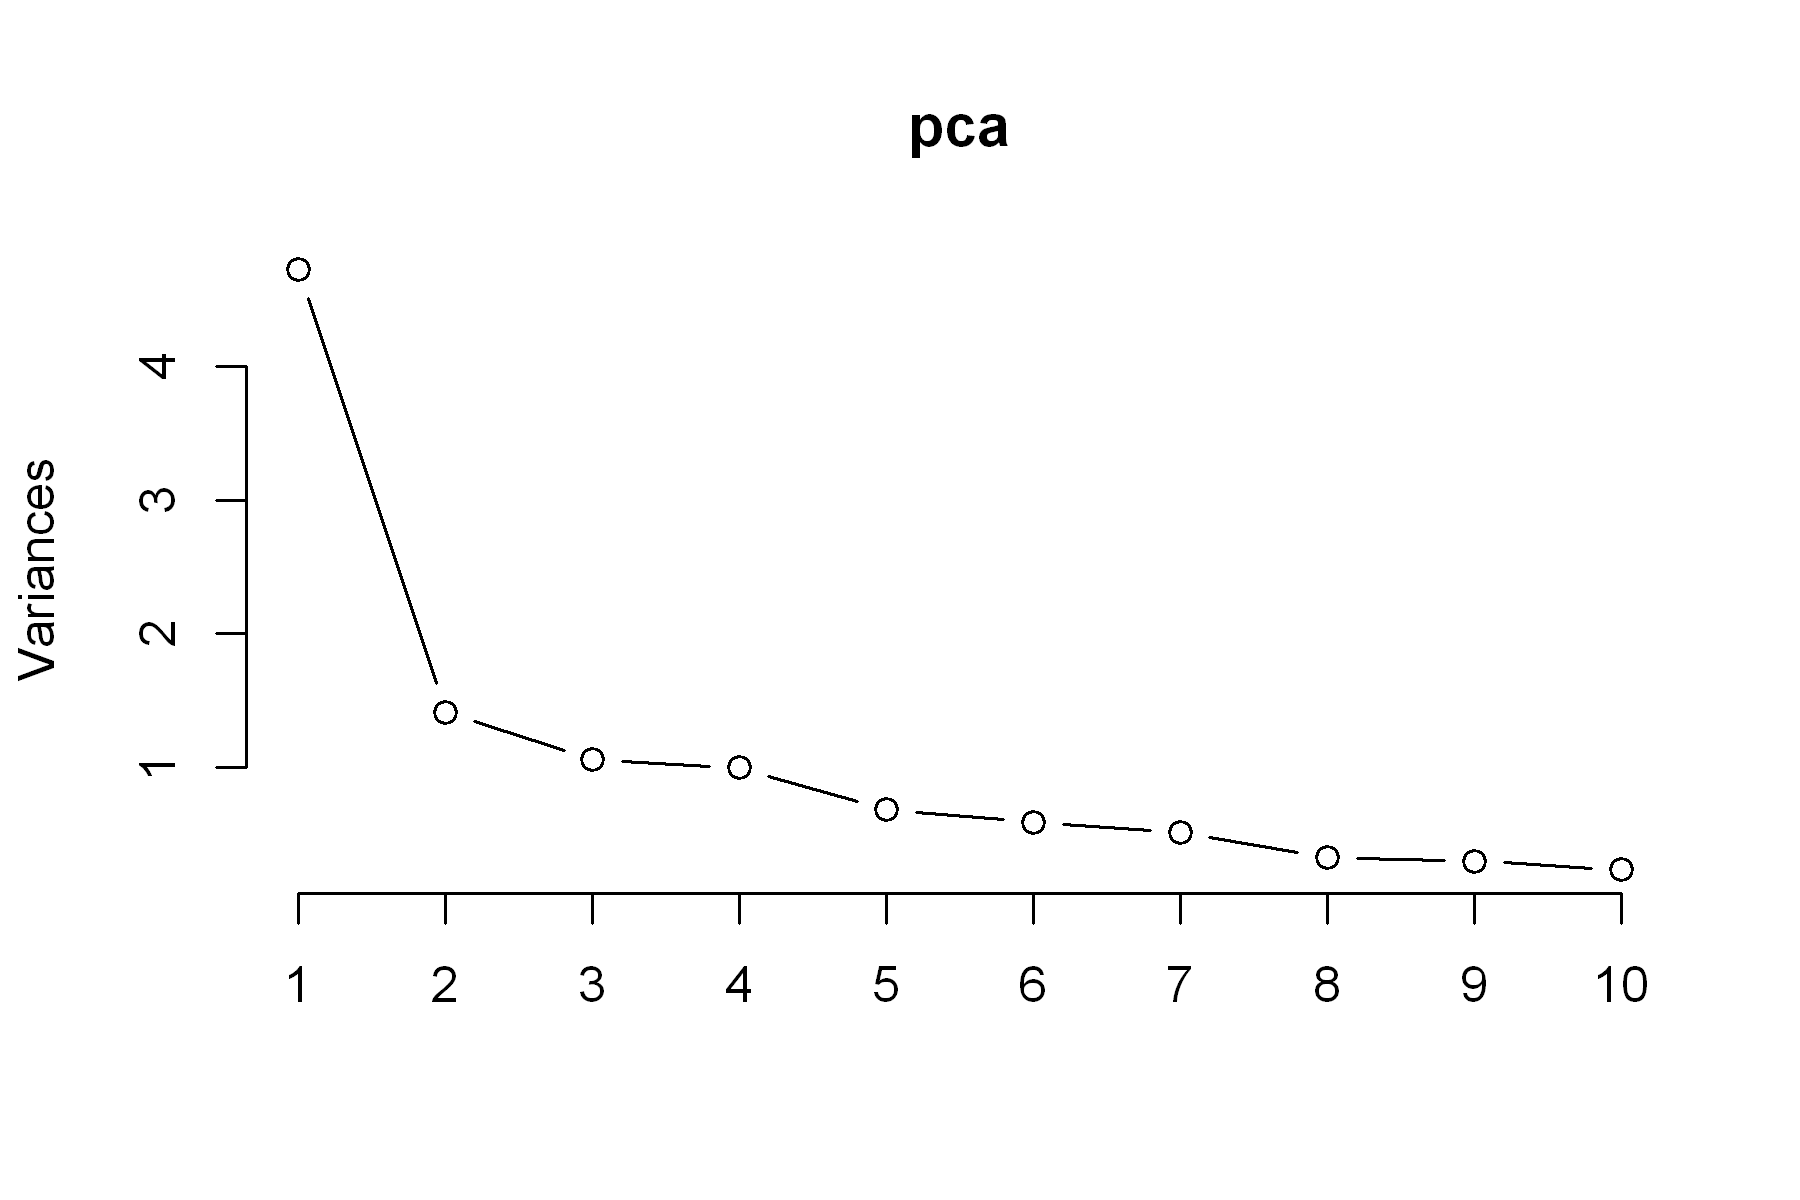

In [44]:
plot(pca, type='l')

In [45]:
str(pca)

List of 5
 $ sdev    : num [1:11] 2.172 1.19 1.031 1 0.831 ...
 $ rotation: num [1:11, 1:11] 0.417 0.354 0.401 0.397 0.344 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:11] 4.13 1.24 1.42 2.38 87.17 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ scale   : Named num [1:11] 1.9 0.504 0.946 1.524 54.23 ...
  ..- attr(*, "names")= chr [1:11] "Accommodates" "Bathrooms" "Bedrooms" "Beds" ...
 $ x       : num [1:4187, 1:11] -2.7433 -0.4473 0.0787 0.5228 -0.6373 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4187] "1" "2" "3" "4" ...
  .. ..$ : chr [1:11] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [46]:
#Matrix de componentes principales
dim(pca$x)

[1] 4187   11

In [47]:
inv_transform_pca<-function(pca_result=df_comp,row){
    v <-matrix(row,nrow=1)    
    df_norm<-v %*% t(pca_result$rotation)
    apartment<-df_norm*pca_result$scale+pca_result$center
    
}

In [48]:
library(data.table)


Attaching package: 'data.table'

The following object is masked from 'package:dendextend':

    set

The following objects are masked from 'package:reshape2':

    dcast, melt

The following objects are masked from 'package:dplyr':

    between, first, last



In [49]:
elementos_cercanos <- function( pca_df, vector) {
    
    apartmentos <- matrix(c(NA), nrow = 5, ncol= 11)
    
    nuevo_piso <- predict(pca_df, vector)
    
    pcx <- pca_df$x
    
    dist <- matrix(c(NA,NA),nrow(pcx), ncol=2)
    colnames(dist) <- c("dist", "ind")
    
    for (i in 1:nrow(pcx)){
        dist[i,1] <- sum((nuevo_piso-pcx[i,])^2)
        dist[i,2] <- i
    }
    
    dist.dt <- data.table(dist, key = "dist")
    
    indice <- as.matrix(dist.dt[1:5, 2])  

    for(i in 1:5) {
        row = pcx[indice[i],]
        apartmentos[i,] = inv_transform_pca(pca_df, row)
    }
    
    colnames(apartmentos) <- c('Accommodates','Bathrooms','Bedrooms','Beds','Price',
                        'Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')
    
    return (apartmentos)
}

In [50]:
test_vector <- df_madrid_pca[sample(nrow(df_madrid_pca), 1), ]
test_vector

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
3797,6,1,2,3,69,2,10,93,40.41512,-3.709287,75.48989


In [51]:
elementos_cercanos(pca, test_vector)

Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
6,1,2,3,69,2,10,93,40.41512,-3.709287,75.48989
6,1,2,3,65,2,10,95,40.41040,-3.710932,75.20650
6,1,2,3,73,2,12,98,40.41440,-3.706026,75.77329
6,1,2,3,85,2,15,95,40.41553,-3.704297,76.62348
5,1,2,3,85,2,10,92,40.41734,-3.704020,68.20041


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?